### Model OFAutoRegressive

In [1]:
import sys
sys.path.append('../pyorderedfuzzy')

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ofnumber as ofn
import ofmodels as ofm
import ofrandom as ofr

In [3]:
#mu = ofn.OFNumber.init_from_scalar(0.0, dim=101) 
mu = ofn.OFNumber.init_trapezoid_x0x1(-0.5, 0, 0.5, 0, dim=101)
sig2 = ofn.OFNumber.init_from_scalar(0.0, dim=101)
s2 = 0.1
p = 0.5

In [4]:
a0 = ofn.OFNumber.init_from_scalar(0.0, dim=101) #ofr.ofnormal(mu, sig2, s2, p)
a1 = ofn.OFNumber.init_from_scalar(0.8, dim=101) #ofr.ofnormal(mu, sig2, s2, p)
a2 = ofn.OFNumber.init_from_scalar(-0.2, dim=101) #ofr.ofnormal(mu, sig2, s2, p)
x_m1 = ofn.OFNumber.init_from_scalar(1.0, dim=101) #ofr.ofnormal(mu, sig2, s2, p)
x_m2 = ofn.OFNumber.init_from_scalar(2.0, dim=101) #ofr.ofnormal(mu, sig2, s2, p)
ofs = ofm.OFSeries([a0,a1,a2,x_m2, x_m1])

<IPython.core.display.Javascript object>


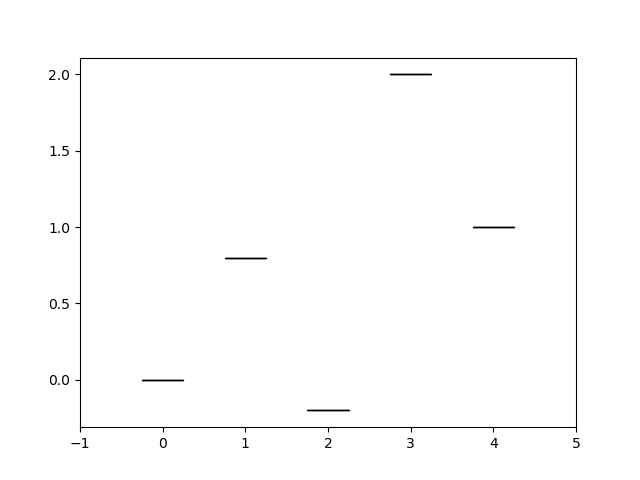

In [5]:
fig, ax = plt.subplots()
ofs.plot_ofseries(ax)
plt.show()

In [6]:
ar2_model = ofm.OFAutoRegressive(order=2)

In [7]:
ar2 = ar2_model.predict(1000, coefs=[a0,a1,a2], initials=[x_m2, x_m1])

<IPython.core.display.Javascript object>


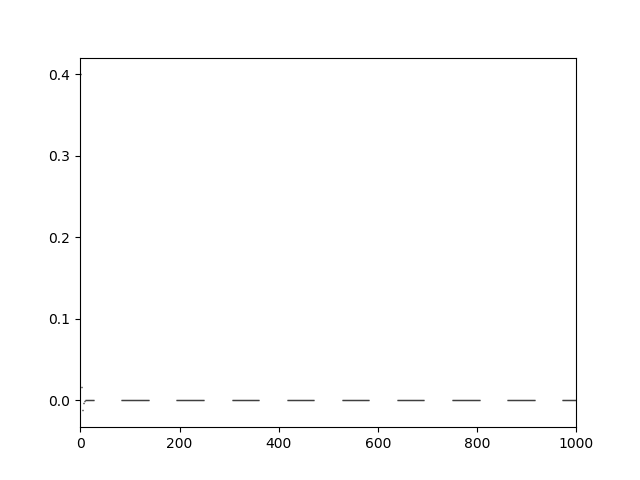

In [8]:
fig, ax = plt.subplots()
ar2.plot_ofseries(ax)
plt.show()

In [9]:
ar2_model.fit(ar2)

<IPython.core.display.Javascript object>


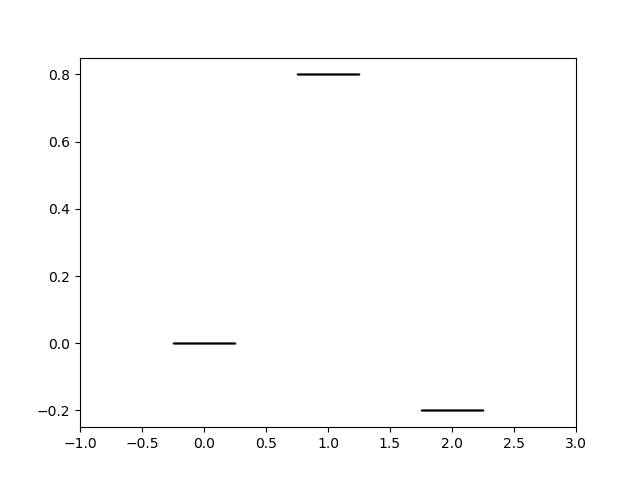

In [10]:
c_true = ofm.OFSeries([a0,a1,a2])
fig, ax = plt.subplots()
c_true.plot_ofseries(ax)
ar2_model.coefs.plot_ofseries(ax)
plt.show()

In [11]:
ar2_sim = ar2 = ar2_model.predict(1000, coefs=[a0,a1,a2], initials=[x_m2, x_m1], error=True)

<IPython.core.display.Javascript object>


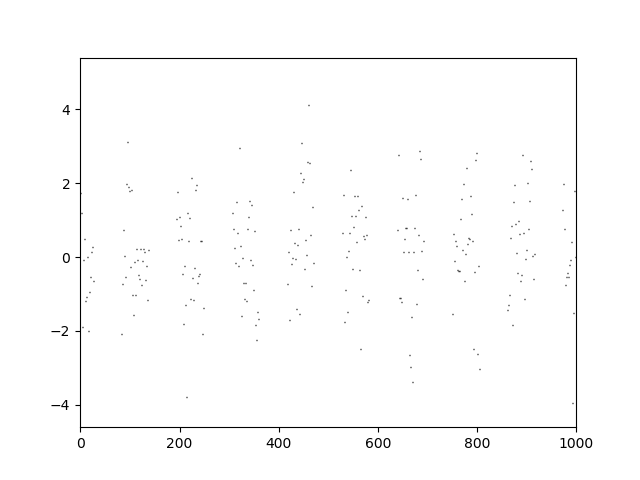

In [12]:
fig, ax = plt.subplots()
ar2_sim.plot_ofseries(ax)
plt.show()

In [13]:
ar2_model.fit(ar2_sim)

<IPython.core.display.Javascript object>


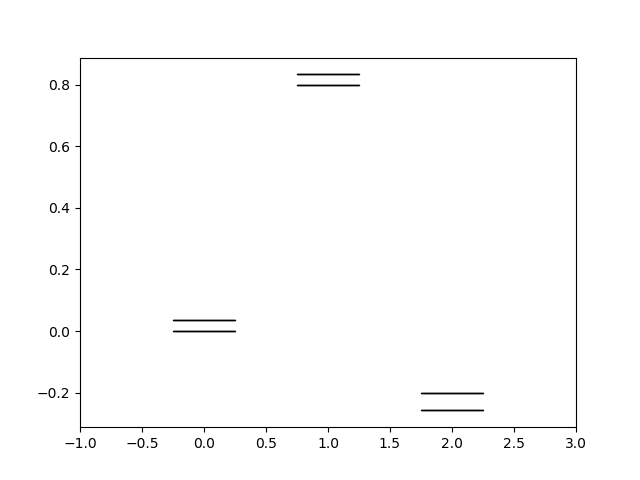

In [14]:
c_true = ofm.OFSeries([a0,a1,a2])
fig, ax = plt.subplots()
c_true.plot_ofseries(ax)
ar2_model.coefs.plot_ofseries(ax)
plt.show()

<IPython.core.display.Javascript object>


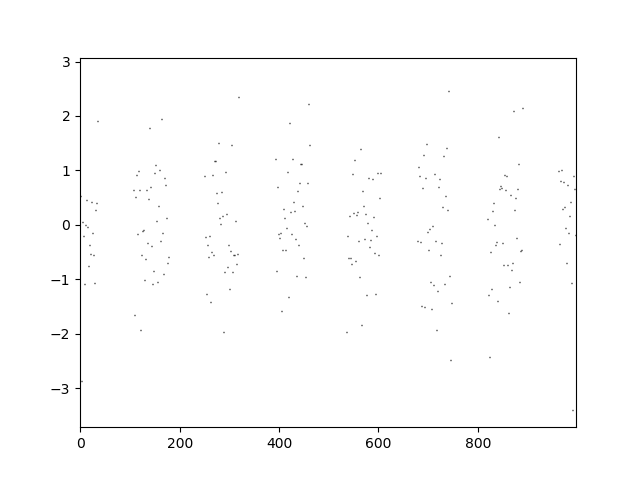

In [15]:
fig, ax = plt.subplots()
ar2_model.residuals.plot_ofseries(ax)
plt.show()

In [16]:
ar2_model.residuals.mean_crisp()

-3.433125713567948e-08

In [17]:
ar2_model.residuals.mean_fuzzy()

([-3.53063632e-08 -3.31211108e-08 -3.46318368e-08 -3.47015482e-08
 -3.32271061e-08 -3.51135632e-08 -3.44516266e-08 -3.39041755e-08
 -3.39936722e-08 -3.46744865e-08 -3.51882190e-08 -3.37089078e-08
 -3.49642761e-08 -3.48440457e-08 -3.41823677e-08 -3.35983210e-08
 -3.42749857e-08 -3.49259567e-08 -3.51702013e-08 -3.51576084e-08
 -3.41409656e-08 -3.52304452e-08 -3.34938774e-08 -3.38516436e-08
 -3.32164779e-08 -3.35576715e-08 -3.40198021e-08 -3.43608814e-08
 -3.40617078e-08 -3.40818038e-08 -3.52714147e-08 -3.38781245e-08
 -3.52189300e-08 -3.33546752e-08 -3.49986336e-08 -3.45544110e-08
 -3.52776891e-08 -3.39281104e-08 -3.36308077e-08 -3.36755195e-08
 -3.34462726e-08 -3.40785759e-08 -3.38356508e-08 -3.41271776e-08
 -3.41931188e-08 -3.33038356e-08 -3.48006638e-08 -3.48371551e-08
 -3.41429203e-08 -3.54506687e-08 -3.49092661e-08 -3.32078563e-08
 -3.54818299e-08 -3.37036269e-08 -3.49005115e-08 -3.52321516e-08
 -3.41042024e-08 -3.49746234e-08 -3.35107032e-08 -3.50218828e-08
 -3.30776239e-08 -3.4502

In [18]:
ar2_model.residuals.order_probability()

1.0

In [19]:
ar2_model.residuals.var_crisp()

0.8921966030022537

<IPython.core.display.Javascript object>


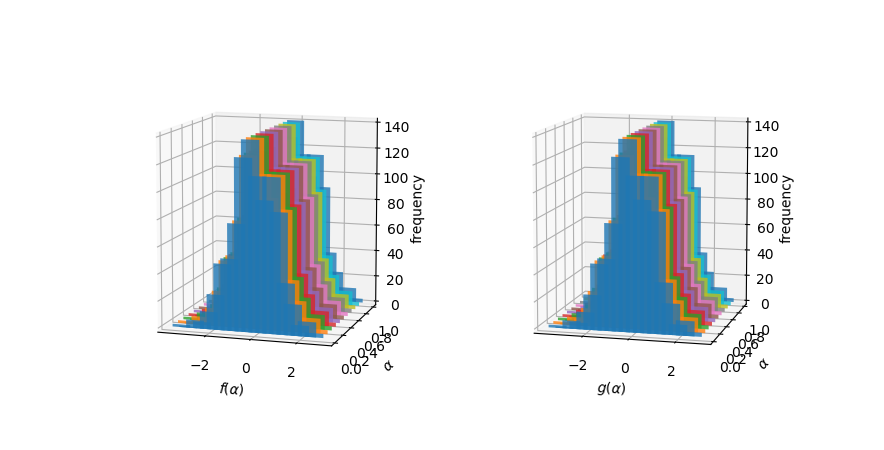

In [20]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
axf = fig.add_subplot(121, projection='3d')
axg = fig.add_subplot(122, projection='3d')
ar2_model.residuals.plot_3d_histogram(axf, axg)
plt.show()